In [2]:
import numpy as np

In [3]:
data=np.load('galaxy_colours.npy')

In [4]:
print(data[0])

(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301, 6.543622e-05)


In [5]:
data.head()


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [6]:
print(data['u'])

[19.84132 19.86318 19.97362 ... 19.82667 19.98672 18.00024]


In [7]:
def get_features_targets(data):
  data=np.load('galaxy_colours.npy')
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:,1] = data['g']-data['r']
  features[:,2] = data['r']-data['i']
  features[:,3] = data['i']-data['z']
  targets=data['redshift']
  return features,targets

In [8]:
 features, targets = get_features_targets(data)
    

In [9]:
print(features[:2])

[[0.31476 0.0571  0.28991 0.07192]
 [1.2002  0.82026 0.45294 0.24665]]


In [10]:
print(targets[:2])

[0.539301  0.1645703]


In [ ]:
print(targets[:1])

In [ ]:
print(targets[:4])

In [ ]:
print(targets[1:2])

In [ ]:
print(targets[1:5])

In [ ]:
print(targets[1:2])


In [11]:
def median_diff(predicted, actual):
  
  return np.median(np.abs(predicted[:] - actual[:]))

In [12]:
def validate_model(model, features, targets):
  split = features.shape[0]//2
  train_features = features[:split]
  test_features = features[split:]
  split2= targets.shape[0]//2
  train_targets=targets[:split2]
  test_targets=targets[split2:]
  # split the data into training and testing features and predictions

  # train the model
  dtr=DecisionTreeRegressor()
  dtr.fit(train_features,train_targets)

  # get the predicted_redshifts
  predictions=dtr.predict(test_features)
  
  # use median_diff function to calculate the accuracy
  return median_diff(test_targets, predictions)


In [13]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
diff = validate_model(dtr, features, targets)

In [14]:
print('Median difference: {:f}'.format(diff))

Median difference: 0.021890


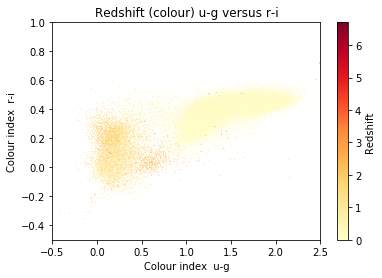

In [20]:
import numpy as np
from matplotlib import pyplot as plt

# Complete the following to make the plot

 
    # Get a colour map
cmap = plt.get_cmap('YlOrRd')

    # Define our colour indexes u-g and r-i
u_g = data['u'] - data['g']
r_i = data['r'] - data['i']

    # Make a redshift array
redshift = data['redshift']

    # Create the plot with plt.scatter
plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap)

cb = plt.colorbar(plot)
cb.set_label('Redshift')

    # Define your axis labels and plot title
plt.xlabel('Colour index  u-g')
plt.ylabel('Colour index  r-i')
plt.title('Redshift (colour) u-g versus r-i')

    # Set any axis limits
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 1)

plt.show()

In [ ]:

plt.show()

In [ ]:
print("hello")

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# paste your get_features_targets function here
def get_features_targets(data):
  features = np.zeros((data.shape[0], 4))
  features[:, 0] = data['u'] - data['g']
  features[:, 1] = data['g'] - data['r']
  features[:, 2] = data['r'] - data['i']
  features[:, 3] = data['i'] - data['z']
  targets = data['redshift']
  return features, targets

# paste your median_diff function here
def median_diff(predicted, actual):
  return np.median(np.abs(predicted - actual))

# Complete the following function
def accuracy_by_treedepth(features, targets, depths):
  # split the data into testing and training sets
  split = features.shape[0]//2
  train_features, test_features = features[:split], features[split:]
  train_targets, test_targets = targets[:split], targets[split:]

  # Initialise arrays or lists to store the accuracies for the below loop
  train_diffs = []
  test_diffs = []

  # Loop through depths
  for depth in depths:
    # initialize model with the maximum depth. 
    dtr = DecisionTreeRegressor(max_depth=depth)

    # train the model using the training set
    dtr.fit(train_features, train_targets)

    # Get the predictions for the training set and calculate their med_diff
    predictions = dtr.predict(train_features)
    train_diffs.append(median_diff(train_targets, predictions))

    # Get the predictions for the testing set and calculate their med_diff
    predictions = dtr.predict(test_features)
    test_diffs.append(median_diff(test_targets, predictions))
        
  # Return the accuracies for the training and testing sets
  return train_diffs, test_diffs 

Depth with lowest median difference : 21


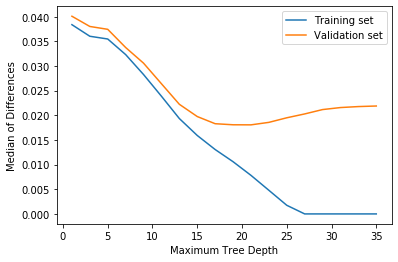

In [18]:
features, targets = get_features_targets(data)

  # Generate several depths to test
tree_depths = [i for i in range(1, 36, 2)]

  # Call the function
train_med_diffs, test_med_diffs = accuracy_by_treedepth(features, targets, tree_depths)
print("Depth with lowest median difference : {}".format(tree_depths[test_med_diffs.index(min(test_med_diffs))]))
    
  # Plot the results
train_plot = plt.plot(tree_depths, train_med_diffs, label='Training set')
test_plot = plt.plot(tree_depths, test_med_diffs, label='Validation set')
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Median of Differences")
plt.legend()
plt.show()